In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# plot
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7.5
rcParams['figure.dpi'] = 80

In [9]:
tweets = pd.read_csv("../data/covid19_tweets1.csv")

In [10]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [11]:
print(tweets.info())
print()
print("shape of the data set is ===> ",tweets.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB
None

shape of the data set is ===>  (179108, 13)


# Exploratory analysis

In [12]:
# number of tweet of the user

tweets['user_name'].value_counts()

GlobalPandemic.NET      679
Coronavirus Updates     625
covidnews.ch            402
Open Letters            390
Blood Donors India      282
                       ... 
Kevin McDonald            1
Patty Lorence             1
Farhaan Uddin Ahmed       1
William D. Jefferson      1
TheJuanCarlosShow         1
Name: user_name, Length: 92276, dtype: int64

### Top 5 user by nuber of tweet

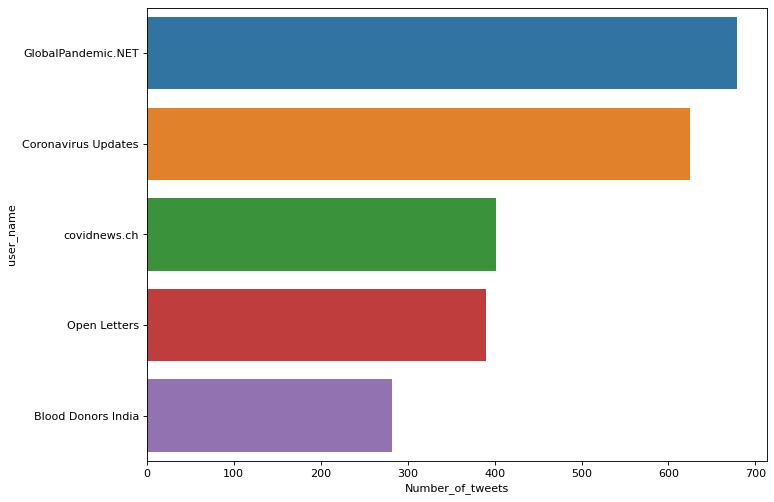

In [13]:

num_tweets = tweets['user_name'].value_counts().reset_index()
num_tweets.columns = ['user_name', 'Number_of_tweets']


sns.barplot(x = "Number_of_tweets", y = "user_name", data = num_tweets.head(5))
plt.show()

### Top 5 Number of Tweets by location

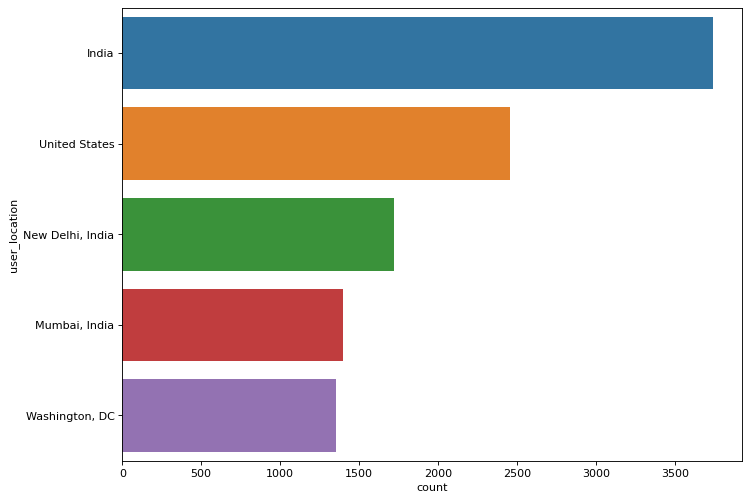

In [14]:
location = tweets['user_location'].value_counts().reset_index()
location.columns = ['user_location', 'count']
location = location[location['user_location'] != 'NA']
location = location.sort_values(['count'], ascending = False)

sns.barplot(x="count", y = "user_location", data = location.head(5))
plt.show()

# Data cleaning 

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import Word


stop_words = set(stopwords.words('english'))


In [16]:
# drop columns
tweets.drop(tweets.columns.difference(['text','date']), 1, inplace=True)

In [17]:
tweets.head()

,date,text
0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [18]:
def tweet_scrubber(text):
   
    # Make tweets all lower case
    text = text.lower()
#     # Remove Mentions
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
#     # Remove URLs,Numbers,Special Characters, and Punctuations  
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    text = re.sub(to_remove, " ", text)
    return text

In [19]:
def lemm_and_stem(text, stem=False, lemmatize=False):
        
    clean_text = []
    words = word_tokenize(text) 
    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if lemmatize:
                clean_text.append(Word(word).lemmatize())
            else:
                clean_text.append(word)
            
    return clean_text

In [20]:
tweets.text = tweets.text.apply(lambda x: lemm_and_stem(tweet_scrubber(x), lemmatize=True))


In [21]:
tweets.text.head()


0    [smelled, scent, hand, sanitizers, today, some...
1             [hey, made, sense, player, pay, respect]
2    [trump, never, claimed, covid, hoax, claim, ef...
3    [one, gift, covid, give, appreciation, simple,...
4    [july, medium, bulletin, novel, coronavirusupd...
Name: text, dtype: object

In [22]:
sentences = tweets.text

In [23]:
sentences[100]

['voice',
 'belt',
 'road',
 'covid',
 'rap',
 'song',
 'alert',
 'needed',
 'precaution',
 'returning',
 'work',
 'beltandroad']

In [24]:
submission_sents = []
for sent in sentences:
  submission_sents.append(" ".join(sent))

In [25]:
submission_df = pd.DataFrame(dict(text = submission_sents, date = tweets['date']))
submission_df.head()

,text,date
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21
1,hey made sense player pay respect,2020-07-25 12:27:17
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08


In [26]:
submission_df["date-day"] = submission_df["date"].apply(lambda x: x.split(" ")[0] if type(x) == str else x)

In [27]:
submission_df.head()

,text,date,date-day
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,2020-07-25
1,hey made sense player pay respect,2020-07-25 12:27:17,2020-07-25
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,2020-07-25
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,2020-07-25
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,2020-07-25


In [28]:
submission_df["date-day"].unique()

array(['2020-07-25', '2020-07-24', '2020-07-26', '2020-07-27',
       '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
       '2020-08-01', '2020-08-02', '2020-08-04', '2020-08-06',
       '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
       '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-22',
       '2020-08-30', '2020-08-29'], dtype=object)

In [29]:
submission_df["date-day"] = pd.to_datetime(submission_df["date-day"])

In [30]:
submission_df.head()

,text,date,date-day
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,2020-07-25
1,hey made sense player pay respect,2020-07-25 12:27:17,2020-07-25
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,2020-07-25
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,2020-07-25
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,2020-07-25


In [31]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   text      179108 non-null  object        
 1   date      179108 non-null  object        
 2   date-day  179108 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.1+ MB


In [32]:
submission_df.loc[0, "date-day"].date().weekday()

5

In [33]:
submission_df["date-day"].min() # The first day of the tweets

Timestamp('2020-07-24 00:00:00')

In [34]:
submission_df["date-day"].min().date().weekday() # The first day of the tweets is Wedensday

4

In [35]:
submission_df["date-day"].max()

Timestamp('2020-08-30 00:00:00')

In [36]:
from datetime import datetime

In [37]:
start_date = datetime.strptime("2020-07-19", "%Y-%m-%d").date() # Starting day of the week is Sunday.


In [38]:
end_date = submission_df["date-day"].max().date()


In [39]:
def week_number(d):
  try:
    return (d.date() - start_date).days // 7 # 7 is for per week
  except:
    return 0

In [40]:
submission_df["week-number"] = submission_df["date-day"].apply(week_number)

In [41]:
submission_df.head()

,text,date,date-day,week-number
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,2020-07-25,0
1,hey made sense player pay respect,2020-07-25 12:27:17,2020-07-25,0
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,2020-07-25,0
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,2020-07-25,0
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,2020-07-25,0


In [42]:
submission_df["week-number"].unique()

array([0, 1, 2, 3, 4, 6, 5])

In [43]:
submission_df.tail()

,text,date,date-day,week-number
179103,thanks nominating wearamask challenge nominate,2020-08-29 19:44:21,2020-08-29,5
179104,year insanity lol covid,2020-08-29 19:44:16,2020-08-29,5
179105,powerful painting juan lucena tribute grandpar...,2020-08-29 19:44:15,2020-08-29,5
179106,student test positive covid major university a...,2020-08-29 19:44:14,2020-08-29,5
179107,stop see stop,2020-08-29 19:44:08,2020-08-29,5


In [44]:
week_1 = submission_df[submission_df["week-number"]==0]

In [45]:
week_1

,text,date,date-day,week-number
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,2020-07-25,0
1,hey made sense player pay respect,2020-07-25 12:27:17,2020-07-25,0
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,2020-07-25,0
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,2020-07-25,0
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,2020-07-25,0
...,...,...,...,...
17171,apparently timberlea store fort mcmurray emplo...,2020-07-24 23:47:13,2020-07-24,0
17172,take eye ball still protest going people dying...,2020-07-24 23:47:12,2020-07-24,0
17173,excellent partnership prevent covid thank shar...,2020-07-24 23:47:12,2020-07-24,0
17174,always honored speak w critical covid health i...,2020-07-24 23:47:12,2020-07-24,0


In [46]:
submission_df= submission_df.drop(['date-day'], axis = 1) 


In [47]:
submission_df.head()

,text,date,week-number
0,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21,0
1,hey made sense player pay respect,2020-07-25 12:27:17,0
2,trump never claimed covid hoax claim effort,2020-07-25 12:27:14,0
3,one gift covid give appreciation simple thing ...,2020-07-25 12:27:10,0
4,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08,0


In [48]:
submission_df.to_csv("../data/preprocessed_data.csv", index=False)